# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

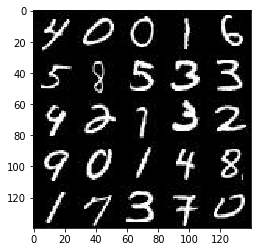

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

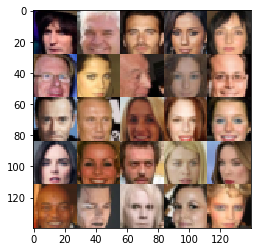

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs = tf.placeholder(tf.float32, 
                           shape=(None, image_width, image_height, image_channels), 
                           name='input_real')
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    #learning_rate = tf.Variable(0.01, False, name='learning_rate')
    return inputs, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [93]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #inputs = tf.reshape(images, [-1, images.shape[1] * images.shape[2] * images.shape[3]])
    alpha = 0.1
    with tf.variable_scope('discriminator', reuse=reuse): # finish this
        h1 = tf.layers.conv2d(images, 64, 3, strides=2, padding='same', activation=None)
        h1 = tf.layers.batch_normalization(h1, training=True)
        h1 = tf.maximum(alpha*h1, h1)
        
        h2 = tf.layers.conv2d(h1, 128, 3, strides=2, padding='same', activation=None)
        h2 = tf.layers.batch_normalization(h2, training=True)
        h2 = tf.maximum(alpha*h2, h2)
        
        h3 = tf.layers.conv2d(h2, 256, 3, strides=2, padding='same', activation=None)
        h3 = tf.layers.batch_normalization(h3, training=True)
        h3 = tf.maximum(alpha*h3, h3)
        
        h4 = tf.layers.conv2d(h3, 512, 3, strides=1, padding='same', activation=None)
        h4 = tf.layers.batch_normalization(h4, training=True)
        h4 = tf.maximum(alpha*h4, h4)
        
        #x1_flat = tf.reshape(x1, [-1, x1.shape[1] * x1.shape[2] * x1.shape[3]])
        #x1_flat = tf.layers.flatten(x1)
        
        logits = tf.layers.dense(tf.contrib.layers.flatten(h4), 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [163]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    # TODO: Implement Function
    def conv_out_size_same(size, stride):
        return math.ceil(float(size) / float(stride))
    
    reuse = not is_train
    d1 = 2
    d2 = 1024
    alpha=0.1
    with tf.variable_scope('generator', reuse=reuse):
        h0 = tf.layers.dense(z, units=d1 * d1 * d2, activation=None)
        h0 = tf.reshape(h0, [-1, d1, d1, d2])
        
        h1 = tf.layers.conv2d_transpose(h0, 512, 5, strides=2, padding='valid')
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha*h1, h1)
        
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, strides=2, padding='same')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha*h2, h2)
        
        h3 = tf.layers.conv2d_transpose(h2, 64, 5, strides=1, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha*h3, h3)
        
        #h4 = tf.layers.conv2d_transpose(h2, 32, 5, strides=1, padding='same')
        #h4 = tf.layers.batch_normalization(h4, training=is_train)
        #h4 = tf.maximum(alpha*h4, h4)
        
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [164]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    input_g = generator(input_z, out_channel_dim, is_train=True)
    output_real, d_logits_real = discriminator(input_real)
    output_g, d_logits_g = discriminator(input_g, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real)))
    d_loss_g = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_g, labels=tf.zeros_like(d_logits_g)))
    d_loss = d_loss_real + d_loss_g
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_g, labels=tf.ones_like(d_logits_g)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [165]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars) 
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return (d_train_opt, g_train_opt)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [166]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [167]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, _, _, img_channels = data_shape
    input_real, input_z, lr = model_inputs(28, 28, img_channels, z_dim=z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, img_channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    step = 0 
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print(tf.trainable_variables())
        #learning_rate = tf.Variable(learning_rate, trainable=False)
        for epoch_i in range(epoch_count):

            for batch_images in get_batches(batch_size):
                batch_images *= 2.0
                # TODO: Train Model
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
            
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, lr: learning_rate})
                
                step += 1
                
                if step % 10 == 0:
                    # At the end of every 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if step % 50 == 0:
                    show_generator_output(sess, 25, input_z, img_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

[<tf.Variable 'generator/dense/kernel:0' shape=(100, 4096) dtype=float32_ref>, <tf.Variable 'generator/dense/bias:0' shape=(4096,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/kernel:0' shape=(5, 5, 512, 1024) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/gamma:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/beta:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/kernel:0' shape=(5, 5, 256, 512) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/gamma:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/beta:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/kernel:0' shape=(5, 5, 64, 256) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/bias:0' 

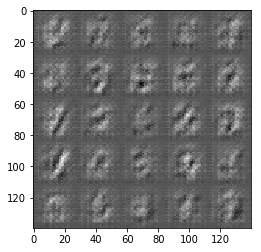

Epoch 1/2 Discriminator Loss: 1.2776 Generator Loss: 0.6143
Epoch 1/2 Discriminator Loss: 1.2374 Generator Loss: 2.2674
Epoch 1/2 Discriminator Loss: 2.0709 Generator Loss: 0.1599
Epoch 1/2 Discriminator Loss: 0.9755 Generator Loss: 2.2942
Epoch 1/2 Discriminator Loss: 0.9411 Generator Loss: 1.4315


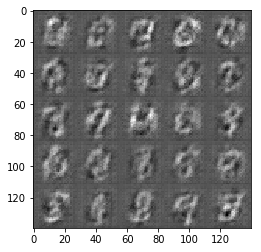

Epoch 1/2 Discriminator Loss: 0.8652 Generator Loss: 1.8036
Epoch 1/2 Discriminator Loss: 1.0698 Generator Loss: 0.7539
Epoch 1/2 Discriminator Loss: 2.2248 Generator Loss: 0.1482
Epoch 1/2 Discriminator Loss: 1.8291 Generator Loss: 0.2347
Epoch 1/2 Discriminator Loss: 1.9949 Generator Loss: 0.1816


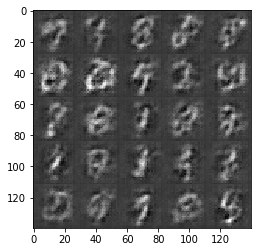

Epoch 1/2 Discriminator Loss: 0.7240 Generator Loss: 1.4713
Epoch 1/2 Discriminator Loss: 0.9677 Generator Loss: 0.7992
Epoch 1/2 Discriminator Loss: 0.7507 Generator Loss: 1.0948
Epoch 1/2 Discriminator Loss: 1.8447 Generator Loss: 0.2099
Epoch 1/2 Discriminator Loss: 1.4124 Generator Loss: 3.2573


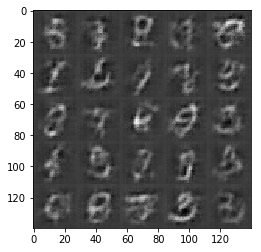

Epoch 1/2 Discriminator Loss: 0.8177 Generator Loss: 0.8278
Epoch 1/2 Discriminator Loss: 2.1949 Generator Loss: 0.1566
Epoch 1/2 Discriminator Loss: 0.7869 Generator Loss: 0.9277
Epoch 1/2 Discriminator Loss: 0.8845 Generator Loss: 0.8519
Epoch 1/2 Discriminator Loss: 0.9458 Generator Loss: 1.2934


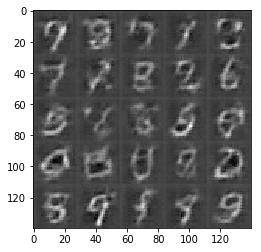

Epoch 1/2 Discriminator Loss: 1.0840 Generator Loss: 0.6862
Epoch 1/2 Discriminator Loss: 0.8314 Generator Loss: 1.4333
Epoch 1/2 Discriminator Loss: 1.0212 Generator Loss: 2.1051
Epoch 1/2 Discriminator Loss: 2.0189 Generator Loss: 0.1943
Epoch 1/2 Discriminator Loss: 0.8024 Generator Loss: 1.1167


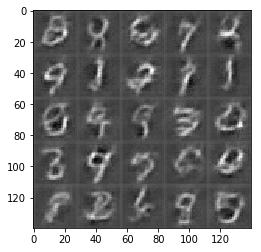

Epoch 1/2 Discriminator Loss: 1.2087 Generator Loss: 0.5465
Epoch 1/2 Discriminator Loss: 0.8283 Generator Loss: 1.3613
Epoch 1/2 Discriminator Loss: 1.0746 Generator Loss: 1.4864
Epoch 1/2 Discriminator Loss: 0.8762 Generator Loss: 0.9538
Epoch 1/2 Discriminator Loss: 1.0693 Generator Loss: 0.7020


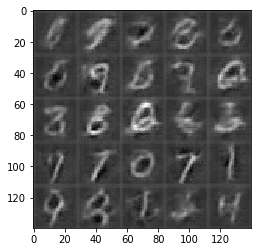

Epoch 1/2 Discriminator Loss: 2.2881 Generator Loss: 0.1369
Epoch 1/2 Discriminator Loss: 1.0390 Generator Loss: 0.8335
Epoch 1/2 Discriminator Loss: 1.0539 Generator Loss: 0.9542
Epoch 1/2 Discriminator Loss: 1.8516 Generator Loss: 0.2422
Epoch 1/2 Discriminator Loss: 0.8945 Generator Loss: 1.6742


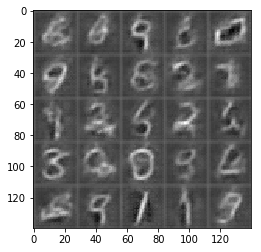

Epoch 1/2 Discriminator Loss: 0.8288 Generator Loss: 1.7142
Epoch 1/2 Discriminator Loss: 1.0988 Generator Loss: 0.7545
Epoch 1/2 Discriminator Loss: 1.2311 Generator Loss: 0.5553
Epoch 1/2 Discriminator Loss: 1.7155 Generator Loss: 0.2934
Epoch 1/2 Discriminator Loss: 0.8067 Generator Loss: 1.7732


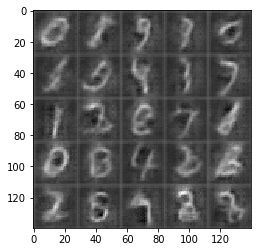

Epoch 1/2 Discriminator Loss: 1.0038 Generator Loss: 1.5103
Epoch 1/2 Discriminator Loss: 0.8936 Generator Loss: 0.9042
Epoch 1/2 Discriminator Loss: 1.2839 Generator Loss: 0.4748
Epoch 1/2 Discriminator Loss: 0.9113 Generator Loss: 0.9796
Epoch 1/2 Discriminator Loss: 0.8851 Generator Loss: 0.8654


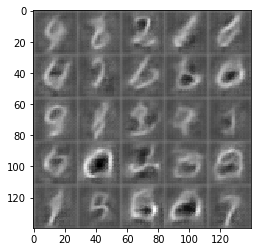

Epoch 1/2 Discriminator Loss: 1.3195 Generator Loss: 0.4591
Epoch 1/2 Discriminator Loss: 0.7240 Generator Loss: 1.2797
Epoch 1/2 Discriminator Loss: 2.2970 Generator Loss: 0.1784
Epoch 1/2 Discriminator Loss: 1.0013 Generator Loss: 0.9878
Epoch 1/2 Discriminator Loss: 1.0350 Generator Loss: 2.0243


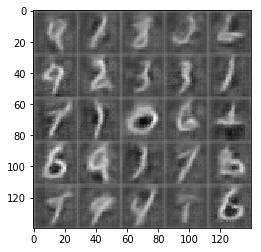

Epoch 1/2 Discriminator Loss: 1.0956 Generator Loss: 0.5521
Epoch 1/2 Discriminator Loss: 0.9347 Generator Loss: 1.8404
Epoch 1/2 Discriminator Loss: 0.8061 Generator Loss: 1.4808
Epoch 1/2 Discriminator Loss: 1.0148 Generator Loss: 0.7143
Epoch 1/2 Discriminator Loss: 1.1412 Generator Loss: 2.4758


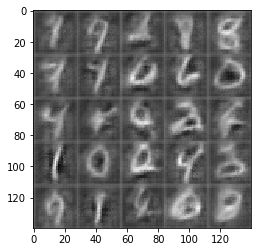

Epoch 1/2 Discriminator Loss: 0.7473 Generator Loss: 1.1918
Epoch 1/2 Discriminator Loss: 0.9318 Generator Loss: 0.7128
Epoch 1/2 Discriminator Loss: 0.8233 Generator Loss: 2.0262
Epoch 1/2 Discriminator Loss: 2.1137 Generator Loss: 0.1950
Epoch 1/2 Discriminator Loss: 1.1813 Generator Loss: 0.5622


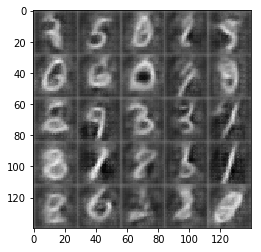

Epoch 1/2 Discriminator Loss: 1.0895 Generator Loss: 0.5332
Epoch 1/2 Discriminator Loss: 1.2168 Generator Loss: 0.4867
Epoch 1/2 Discriminator Loss: 0.8271 Generator Loss: 0.9218
Epoch 1/2 Discriminator Loss: 2.1898 Generator Loss: 0.1626
Epoch 1/2 Discriminator Loss: 0.7929 Generator Loss: 0.9445


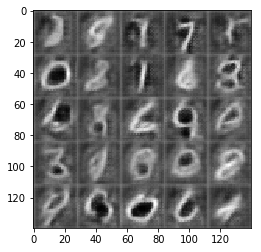

Epoch 1/2 Discriminator Loss: 0.7468 Generator Loss: 1.0413
Epoch 1/2 Discriminator Loss: 0.5392 Generator Loss: 1.3977
Epoch 1/2 Discriminator Loss: 0.7532 Generator Loss: 0.9132
Epoch 1/2 Discriminator Loss: 1.0256 Generator Loss: 0.7961
Epoch 1/2 Discriminator Loss: 0.7945 Generator Loss: 1.0424


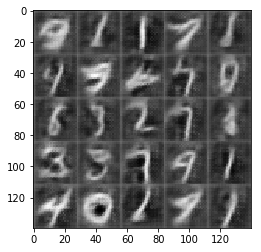

Epoch 1/2 Discriminator Loss: 0.5722 Generator Loss: 1.7341
Epoch 1/2 Discriminator Loss: 0.7436 Generator Loss: 1.7651
Epoch 1/2 Discriminator Loss: 0.7705 Generator Loss: 1.0894
Epoch 1/2 Discriminator Loss: 1.1549 Generator Loss: 0.6016
Epoch 1/2 Discriminator Loss: 0.8703 Generator Loss: 0.9080


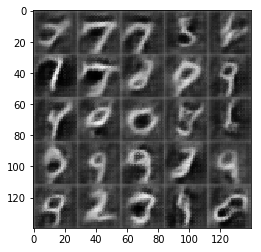

Epoch 1/2 Discriminator Loss: 0.6587 Generator Loss: 1.1045
Epoch 1/2 Discriminator Loss: 0.7235 Generator Loss: 2.7567
Epoch 1/2 Discriminator Loss: 0.6693 Generator Loss: 1.1082
Epoch 1/2 Discriminator Loss: 0.6246 Generator Loss: 1.4176
Epoch 1/2 Discriminator Loss: 1.1557 Generator Loss: 0.5243


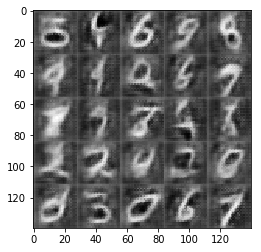

Epoch 1/2 Discriminator Loss: 1.5954 Generator Loss: 0.3589
Epoch 1/2 Discriminator Loss: 0.3263 Generator Loss: 2.1387
Epoch 1/2 Discriminator Loss: 1.8156 Generator Loss: 0.2537
Epoch 1/2 Discriminator Loss: 0.9140 Generator Loss: 1.7621
Epoch 1/2 Discriminator Loss: 0.5579 Generator Loss: 1.6879


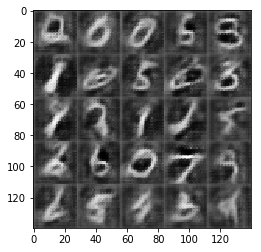

Epoch 1/2 Discriminator Loss: 0.7458 Generator Loss: 0.9629
Epoch 1/2 Discriminator Loss: 0.7976 Generator Loss: 0.9575
Epoch 1/2 Discriminator Loss: 0.7955 Generator Loss: 0.9435
Epoch 2/2 Discriminator Loss: 0.6395 Generator Loss: 1.0750
Epoch 2/2 Discriminator Loss: 0.9074 Generator Loss: 0.9952


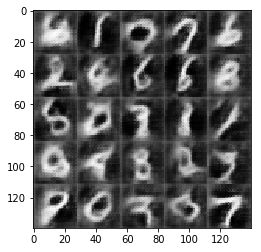

Epoch 2/2 Discriminator Loss: 0.9135 Generator Loss: 0.8952
Epoch 2/2 Discriminator Loss: 0.9919 Generator Loss: 0.7410
Epoch 2/2 Discriminator Loss: 0.6060 Generator Loss: 1.7276
Epoch 2/2 Discriminator Loss: 0.4864 Generator Loss: 1.6968
Epoch 2/2 Discriminator Loss: 0.4414 Generator Loss: 1.9605


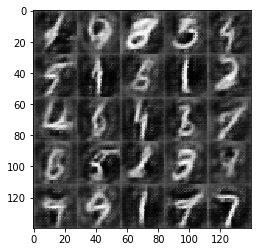

Epoch 2/2 Discriminator Loss: 0.6281 Generator Loss: 1.6751
Epoch 2/2 Discriminator Loss: 0.7395 Generator Loss: 0.9679
Epoch 2/2 Discriminator Loss: 2.6202 Generator Loss: 0.1778
Epoch 2/2 Discriminator Loss: 0.5873 Generator Loss: 2.8852
Epoch 2/2 Discriminator Loss: 0.6594 Generator Loss: 2.6510


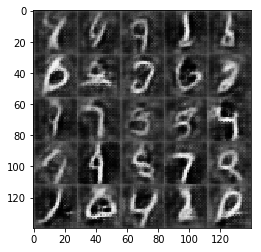

Epoch 2/2 Discriminator Loss: 0.7880 Generator Loss: 0.8314
Epoch 2/2 Discriminator Loss: 0.8058 Generator Loss: 0.9906
Epoch 2/2 Discriminator Loss: 0.6183 Generator Loss: 1.2063
Epoch 2/2 Discriminator Loss: 0.5152 Generator Loss: 1.4139
Epoch 2/2 Discriminator Loss: 0.4583 Generator Loss: 1.7223


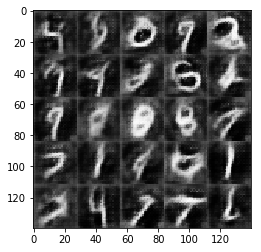

Epoch 2/2 Discriminator Loss: 0.7148 Generator Loss: 1.3427
Epoch 2/2 Discriminator Loss: 0.5237 Generator Loss: 1.4702
Epoch 2/2 Discriminator Loss: 0.8290 Generator Loss: 2.5569
Epoch 2/2 Discriminator Loss: 0.7145 Generator Loss: 1.1229
Epoch 2/2 Discriminator Loss: 0.7705 Generator Loss: 0.9455


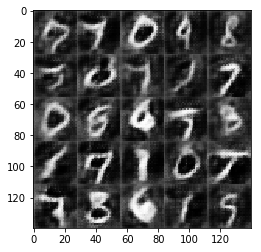

Epoch 2/2 Discriminator Loss: 1.9776 Generator Loss: 0.2357
Epoch 2/2 Discriminator Loss: 0.4935 Generator Loss: 2.2332
Epoch 2/2 Discriminator Loss: 1.0644 Generator Loss: 0.9016
Epoch 2/2 Discriminator Loss: 0.4068 Generator Loss: 2.7150
Epoch 2/2 Discriminator Loss: 0.6639 Generator Loss: 1.0635


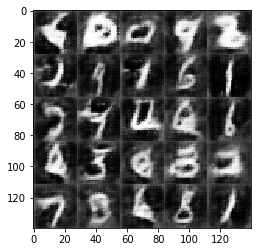

Epoch 2/2 Discriminator Loss: 0.8103 Generator Loss: 3.4481
Epoch 2/2 Discriminator Loss: 1.0134 Generator Loss: 0.6624
Epoch 2/2 Discriminator Loss: 0.6282 Generator Loss: 1.5160
Epoch 2/2 Discriminator Loss: 0.7966 Generator Loss: 0.9270
Epoch 2/2 Discriminator Loss: 0.9526 Generator Loss: 0.7372


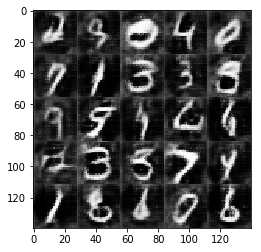

Epoch 2/2 Discriminator Loss: 0.5542 Generator Loss: 3.6941
Epoch 2/2 Discriminator Loss: 0.4023 Generator Loss: 2.0066
Epoch 2/2 Discriminator Loss: 0.9933 Generator Loss: 0.6917
Epoch 2/2 Discriminator Loss: 0.6349 Generator Loss: 2.9248
Epoch 2/2 Discriminator Loss: 1.1645 Generator Loss: 0.5153


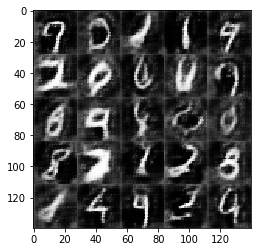

Epoch 2/2 Discriminator Loss: 0.8466 Generator Loss: 0.9824
Epoch 2/2 Discriminator Loss: 0.6332 Generator Loss: 2.6289
Epoch 2/2 Discriminator Loss: 0.6331 Generator Loss: 1.8860
Epoch 2/2 Discriminator Loss: 0.4629 Generator Loss: 1.6107
Epoch 2/2 Discriminator Loss: 0.3552 Generator Loss: 1.9759


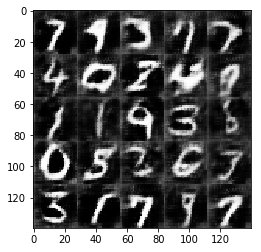

Epoch 2/2 Discriminator Loss: 1.8853 Generator Loss: 0.3156
Epoch 2/2 Discriminator Loss: 0.6099 Generator Loss: 1.1485
Epoch 2/2 Discriminator Loss: 0.3428 Generator Loss: 1.9862
Epoch 2/2 Discriminator Loss: 0.8591 Generator Loss: 0.8435
Epoch 2/2 Discriminator Loss: 0.4944 Generator Loss: 1.5906


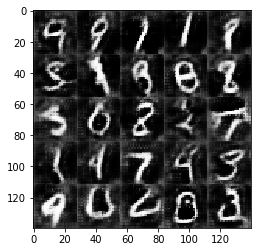

Epoch 2/2 Discriminator Loss: 1.6397 Generator Loss: 0.4365
Epoch 2/2 Discriminator Loss: 0.8009 Generator Loss: 0.9814
Epoch 2/2 Discriminator Loss: 0.4675 Generator Loss: 1.6524
Epoch 2/2 Discriminator Loss: 0.5311 Generator Loss: 1.5185
Epoch 2/2 Discriminator Loss: 0.3882 Generator Loss: 1.6929


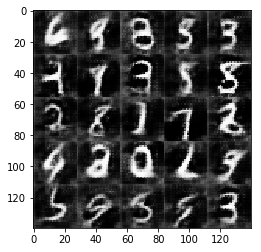

Epoch 2/2 Discriminator Loss: 0.5808 Generator Loss: 1.2252
Epoch 2/2 Discriminator Loss: 0.2565 Generator Loss: 2.1595
Epoch 2/2 Discriminator Loss: 0.7252 Generator Loss: 1.0429
Epoch 2/2 Discriminator Loss: 0.3452 Generator Loss: 2.1561
Epoch 2/2 Discriminator Loss: 0.3612 Generator Loss: 2.2446


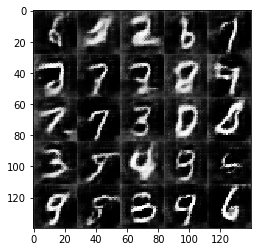

Epoch 2/2 Discriminator Loss: 0.6539 Generator Loss: 1.1091
Epoch 2/2 Discriminator Loss: 0.7095 Generator Loss: 0.9266
Epoch 2/2 Discriminator Loss: 0.6179 Generator Loss: 1.1730
Epoch 2/2 Discriminator Loss: 0.6561 Generator Loss: 1.1088
Epoch 2/2 Discriminator Loss: 1.5441 Generator Loss: 0.5741


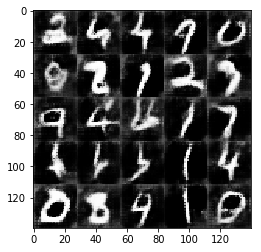

Epoch 2/2 Discriminator Loss: 0.5360 Generator Loss: 1.6385
Epoch 2/2 Discriminator Loss: 0.4981 Generator Loss: 1.9540
Epoch 2/2 Discriminator Loss: 0.7213 Generator Loss: 0.9933
Epoch 2/2 Discriminator Loss: 0.5700 Generator Loss: 1.3124
Epoch 2/2 Discriminator Loss: 0.4039 Generator Loss: 1.5866


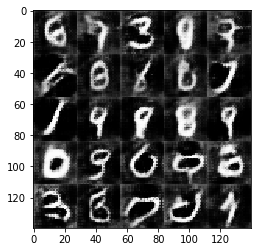

Epoch 2/2 Discriminator Loss: 0.3925 Generator Loss: 1.7040
Epoch 2/2 Discriminator Loss: 0.6063 Generator Loss: 1.1800
Epoch 2/2 Discriminator Loss: 0.8592 Generator Loss: 0.8310
Epoch 2/2 Discriminator Loss: 0.8743 Generator Loss: 0.7273
Epoch 2/2 Discriminator Loss: 0.5917 Generator Loss: 1.2556


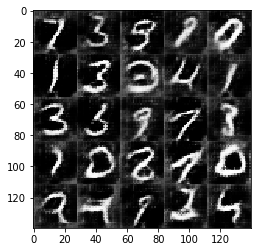

Epoch 2/2 Discriminator Loss: 0.8375 Generator Loss: 4.0492
Epoch 2/2 Discriminator Loss: 0.5327 Generator Loss: 1.3596
Epoch 2/2 Discriminator Loss: 0.2371 Generator Loss: 2.5335
Epoch 2/2 Discriminator Loss: 0.3200 Generator Loss: 2.3380
Epoch 2/2 Discriminator Loss: 1.6199 Generator Loss: 5.7856


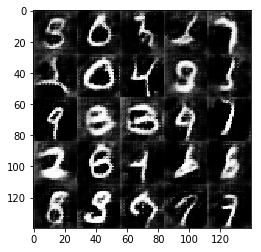

Epoch 2/2 Discriminator Loss: 2.1229 Generator Loss: 4.3682
Epoch 2/2 Discriminator Loss: 0.5795 Generator Loss: 1.4547
Epoch 2/2 Discriminator Loss: 0.8809 Generator Loss: 0.9205
Epoch 2/2 Discriminator Loss: 1.0283 Generator Loss: 0.7052
Epoch 2/2 Discriminator Loss: 0.8481 Generator Loss: 0.8376


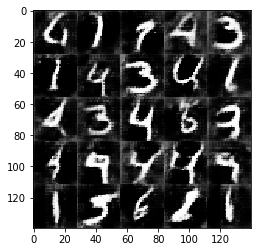

Epoch 2/2 Discriminator Loss: 0.7359 Generator Loss: 1.1250
Epoch 2/2 Discriminator Loss: 0.4505 Generator Loss: 1.4367
Epoch 2/2 Discriminator Loss: 0.4760 Generator Loss: 1.3053
Epoch 2/2 Discriminator Loss: 1.1942 Generator Loss: 0.6111
Epoch 2/2 Discriminator Loss: 0.7584 Generator Loss: 0.9961


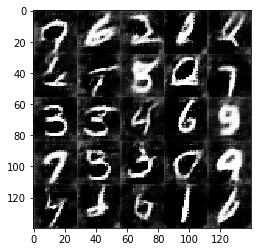

Epoch 2/2 Discriminator Loss: 0.9325 Generator Loss: 0.9533
Epoch 2/2 Discriminator Loss: 0.4249 Generator Loss: 1.5558
Epoch 2/2 Discriminator Loss: 2.2075 Generator Loss: 0.2182
Epoch 2/2 Discriminator Loss: 0.8774 Generator Loss: 0.9595
Epoch 2/2 Discriminator Loss: 0.8611 Generator Loss: 0.9479


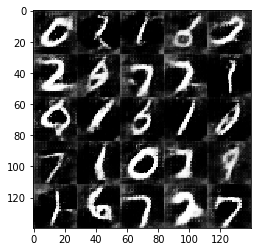

Epoch 2/2 Discriminator Loss: 0.7896 Generator Loss: 0.9043
Epoch 2/2 Discriminator Loss: 0.4285 Generator Loss: 1.6671


In [171]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

[<tf.Variable 'generator/dense/kernel:0' shape=(100, 4096) dtype=float32_ref>, <tf.Variable 'generator/dense/bias:0' shape=(4096,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/kernel:0' shape=(5, 5, 512, 1024) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/gamma:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization/beta:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/kernel:0' shape=(5, 5, 256, 512) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_1/bias:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/gamma:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/batch_normalization_1/beta:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/kernel:0' shape=(5, 5, 64, 256) dtype=float32_ref>, <tf.Variable 'generator/conv2d_transpose_2/bias:0' 

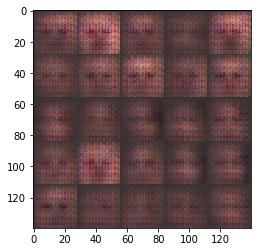

Epoch 1/1 Discriminator Loss: 1.9768 Generator Loss: 0.4285
Epoch 1/1 Discriminator Loss: 2.2338 Generator Loss: 3.4624
Epoch 1/1 Discriminator Loss: 2.4989 Generator Loss: 0.1833
Epoch 1/1 Discriminator Loss: 2.6054 Generator Loss: 0.1977
Epoch 1/1 Discriminator Loss: 1.4266 Generator Loss: 1.6894


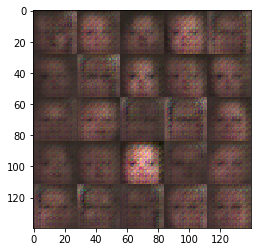

Epoch 1/1 Discriminator Loss: 2.0456 Generator Loss: 0.2050
Epoch 1/1 Discriminator Loss: 1.0337 Generator Loss: 0.8026
Epoch 1/1 Discriminator Loss: 1.4349 Generator Loss: 1.9200
Epoch 1/1 Discriminator Loss: 1.2967 Generator Loss: 0.6483
Epoch 1/1 Discriminator Loss: 1.3337 Generator Loss: 0.6558


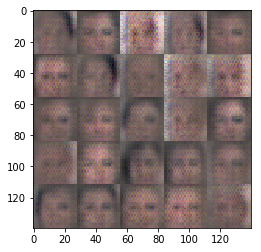

Epoch 1/1 Discriminator Loss: 2.5435 Generator Loss: 3.5176
Epoch 1/1 Discriminator Loss: 1.4970 Generator Loss: 1.1467
Epoch 1/1 Discriminator Loss: 1.3766 Generator Loss: 1.1540
Epoch 1/1 Discriminator Loss: 1.6201 Generator Loss: 0.3803
Epoch 1/1 Discriminator Loss: 1.3054 Generator Loss: 1.7595


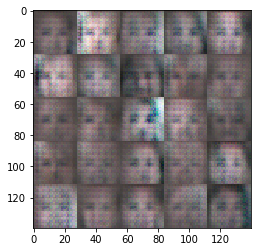

Epoch 1/1 Discriminator Loss: 1.2635 Generator Loss: 1.9152
Epoch 1/1 Discriminator Loss: 1.1493 Generator Loss: 1.9112
Epoch 1/1 Discriminator Loss: 1.5968 Generator Loss: 0.6368
Epoch 1/1 Discriminator Loss: 1.1206 Generator Loss: 1.2312
Epoch 1/1 Discriminator Loss: 1.0929 Generator Loss: 0.9229


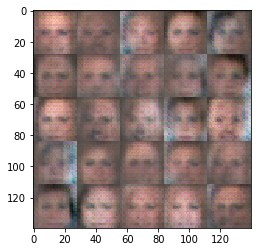

Epoch 1/1 Discriminator Loss: 1.2116 Generator Loss: 0.6045
Epoch 1/1 Discriminator Loss: 1.5247 Generator Loss: 0.4419
Epoch 1/1 Discriminator Loss: 1.8606 Generator Loss: 0.3326
Epoch 1/1 Discriminator Loss: 1.1610 Generator Loss: 1.2777
Epoch 1/1 Discriminator Loss: 1.3673 Generator Loss: 0.5469


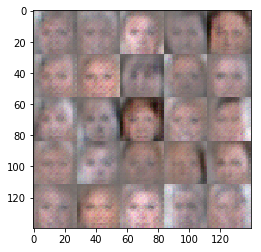

Epoch 1/1 Discriminator Loss: 1.3349 Generator Loss: 1.9302
Epoch 1/1 Discriminator Loss: 1.8200 Generator Loss: 0.2722
Epoch 1/1 Discriminator Loss: 1.1702 Generator Loss: 0.7022
Epoch 1/1 Discriminator Loss: 1.2619 Generator Loss: 0.8484
Epoch 1/1 Discriminator Loss: 1.0558 Generator Loss: 1.3267


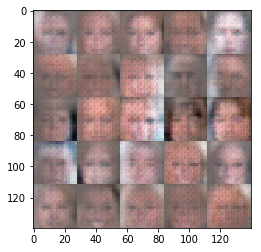

Epoch 1/1 Discriminator Loss: 1.8674 Generator Loss: 1.6815
Epoch 1/1 Discriminator Loss: 1.2429 Generator Loss: 1.0526
Epoch 1/1 Discriminator Loss: 1.3541 Generator Loss: 1.3372
Epoch 1/1 Discriminator Loss: 1.4003 Generator Loss: 0.5633
Epoch 1/1 Discriminator Loss: 0.9033 Generator Loss: 0.9348


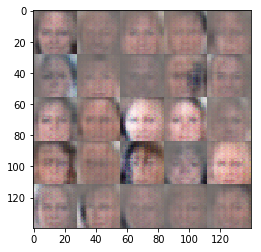

Epoch 1/1 Discriminator Loss: 1.2708 Generator Loss: 1.5314
Epoch 1/1 Discriminator Loss: 1.2501 Generator Loss: 0.8471
Epoch 1/1 Discriminator Loss: 1.2299 Generator Loss: 1.0795
Epoch 1/1 Discriminator Loss: 1.4739 Generator Loss: 0.4082
Epoch 1/1 Discriminator Loss: 1.3714 Generator Loss: 0.6359


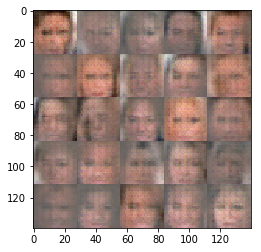

Epoch 1/1 Discriminator Loss: 1.2986 Generator Loss: 0.5430
Epoch 1/1 Discriminator Loss: 1.3178 Generator Loss: 0.4766
Epoch 1/1 Discriminator Loss: 1.2742 Generator Loss: 0.5727
Epoch 1/1 Discriminator Loss: 1.1330 Generator Loss: 1.8057
Epoch 1/1 Discriminator Loss: 1.1226 Generator Loss: 1.4088


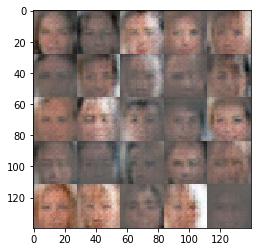

Epoch 1/1 Discriminator Loss: 1.2508 Generator Loss: 0.5040
Epoch 1/1 Discriminator Loss: 1.1169 Generator Loss: 0.7411
Epoch 1/1 Discriminator Loss: 1.3091 Generator Loss: 0.6386
Epoch 1/1 Discriminator Loss: 1.3601 Generator Loss: 0.5391
Epoch 1/1 Discriminator Loss: 1.1974 Generator Loss: 0.8540


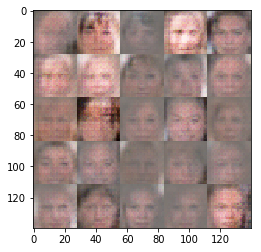

Epoch 1/1 Discriminator Loss: 1.3197 Generator Loss: 0.9574
Epoch 1/1 Discriminator Loss: 1.5159 Generator Loss: 0.4228
Epoch 1/1 Discriminator Loss: 0.9802 Generator Loss: 1.1830
Epoch 1/1 Discriminator Loss: 1.8312 Generator Loss: 2.7474
Epoch 1/1 Discriminator Loss: 1.1298 Generator Loss: 0.8451


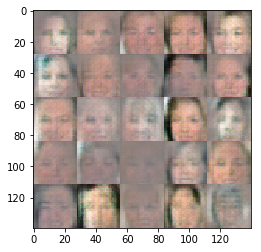

Epoch 1/1 Discriminator Loss: 1.2304 Generator Loss: 2.9770
Epoch 1/1 Discriminator Loss: 1.3517 Generator Loss: 2.3166
Epoch 1/1 Discriminator Loss: 1.8507 Generator Loss: 3.2939
Epoch 1/1 Discriminator Loss: 1.2328 Generator Loss: 0.7583
Epoch 1/1 Discriminator Loss: 1.6473 Generator Loss: 0.2750


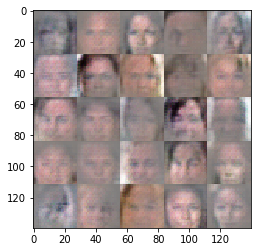

Epoch 1/1 Discriminator Loss: 1.2507 Generator Loss: 0.4988
Epoch 1/1 Discriminator Loss: 0.8010 Generator Loss: 1.2980
Epoch 1/1 Discriminator Loss: 1.0473 Generator Loss: 0.9898
Epoch 1/1 Discriminator Loss: 1.3631 Generator Loss: 0.8738
Epoch 1/1 Discriminator Loss: 1.3139 Generator Loss: 0.9786


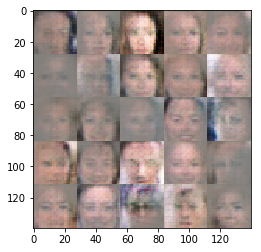

Epoch 1/1 Discriminator Loss: 1.4736 Generator Loss: 1.0079
Epoch 1/1 Discriminator Loss: 1.2208 Generator Loss: 0.7550
Epoch 1/1 Discriminator Loss: 1.1187 Generator Loss: 0.5846
Epoch 1/1 Discriminator Loss: 1.0197 Generator Loss: 0.9739
Epoch 1/1 Discriminator Loss: 0.7709 Generator Loss: 1.7843


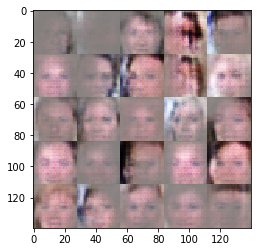

Epoch 1/1 Discriminator Loss: 1.0807 Generator Loss: 0.6739
Epoch 1/1 Discriminator Loss: 1.4616 Generator Loss: 0.3755
Epoch 1/1 Discriminator Loss: 1.2931 Generator Loss: 0.7059
Epoch 1/1 Discriminator Loss: 1.9576 Generator Loss: 0.2243
Epoch 1/1 Discriminator Loss: 1.0033 Generator Loss: 1.9452


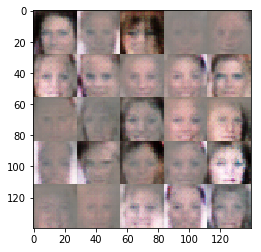

Epoch 1/1 Discriminator Loss: 1.2800 Generator Loss: 0.7120
Epoch 1/1 Discriminator Loss: 1.1543 Generator Loss: 0.9879
Epoch 1/1 Discriminator Loss: 0.7879 Generator Loss: 1.3791
Epoch 1/1 Discriminator Loss: 1.6359 Generator Loss: 1.3671
Epoch 1/1 Discriminator Loss: 1.3629 Generator Loss: 0.5507


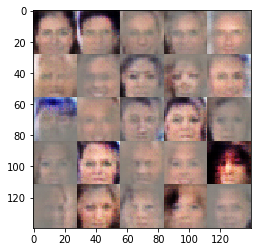

Epoch 1/1 Discriminator Loss: 1.3967 Generator Loss: 0.4612
Epoch 1/1 Discriminator Loss: 1.1964 Generator Loss: 0.5051
Epoch 1/1 Discriminator Loss: 1.1433 Generator Loss: 1.1285
Epoch 1/1 Discriminator Loss: 1.4209 Generator Loss: 0.3600
Epoch 1/1 Discriminator Loss: 1.5091 Generator Loss: 1.5873


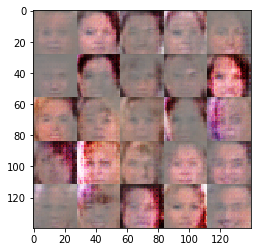

Epoch 1/1 Discriminator Loss: 2.0155 Generator Loss: 0.1893
Epoch 1/1 Discriminator Loss: 1.7912 Generator Loss: 1.8080
Epoch 1/1 Discriminator Loss: 1.5259 Generator Loss: 0.3696
Epoch 1/1 Discriminator Loss: 1.1640 Generator Loss: 1.9498
Epoch 1/1 Discriminator Loss: 3.3964 Generator Loss: 4.7170


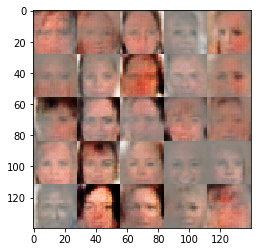

Epoch 1/1 Discriminator Loss: 1.3122 Generator Loss: 0.5073
Epoch 1/1 Discriminator Loss: 1.1406 Generator Loss: 0.7109
Epoch 1/1 Discriminator Loss: 1.2496 Generator Loss: 1.2846
Epoch 1/1 Discriminator Loss: 1.4834 Generator Loss: 0.3553
Epoch 1/1 Discriminator Loss: 1.1309 Generator Loss: 0.9829


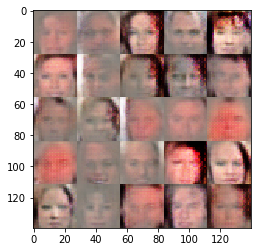

Epoch 1/1 Discriminator Loss: 1.1675 Generator Loss: 1.0440
Epoch 1/1 Discriminator Loss: 1.1661 Generator Loss: 0.7079
Epoch 1/1 Discriminator Loss: 1.0086 Generator Loss: 0.8042
Epoch 1/1 Discriminator Loss: 2.3428 Generator Loss: 2.0719
Epoch 1/1 Discriminator Loss: 1.1398 Generator Loss: 0.7334


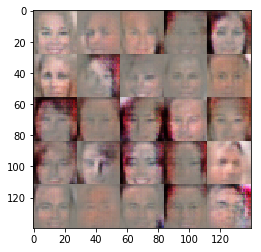

Epoch 1/1 Discriminator Loss: 1.1764 Generator Loss: 0.5466
Epoch 1/1 Discriminator Loss: 1.7128 Generator Loss: 0.2746
Epoch 1/1 Discriminator Loss: 0.9103 Generator Loss: 1.0610
Epoch 1/1 Discriminator Loss: 1.4315 Generator Loss: 1.4054
Epoch 1/1 Discriminator Loss: 2.7620 Generator Loss: 4.4731


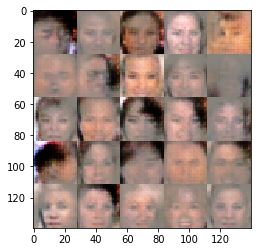

Epoch 1/1 Discriminator Loss: 1.0224 Generator Loss: 0.7232
Epoch 1/1 Discriminator Loss: 0.5224 Generator Loss: 1.5163
Epoch 1/1 Discriminator Loss: 1.0680 Generator Loss: 0.8475
Epoch 1/1 Discriminator Loss: 1.6583 Generator Loss: 0.2951
Epoch 1/1 Discriminator Loss: 2.2900 Generator Loss: 3.4631


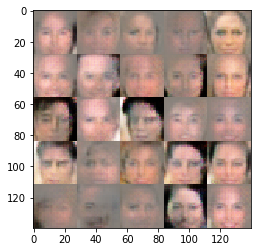

Epoch 1/1 Discriminator Loss: 1.1140 Generator Loss: 0.7335
Epoch 1/1 Discriminator Loss: 0.8793 Generator Loss: 0.8930
Epoch 1/1 Discriminator Loss: 0.4958 Generator Loss: 1.9906
Epoch 1/1 Discriminator Loss: 1.1191 Generator Loss: 1.2573
Epoch 1/1 Discriminator Loss: 0.8434 Generator Loss: 0.8424


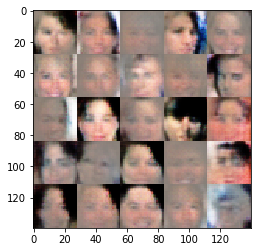

Epoch 1/1 Discriminator Loss: 0.8264 Generator Loss: 0.7223
Epoch 1/1 Discriminator Loss: 1.1560 Generator Loss: 1.1068
Epoch 1/1 Discriminator Loss: 1.2913 Generator Loss: 0.9601
Epoch 1/1 Discriminator Loss: 1.2043 Generator Loss: 1.0466
Epoch 1/1 Discriminator Loss: 1.0175 Generator Loss: 0.9351


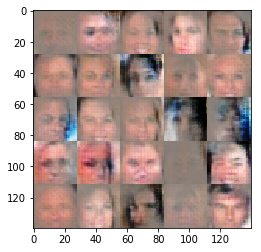

Epoch 1/1 Discriminator Loss: 1.1585 Generator Loss: 0.6262
Epoch 1/1 Discriminator Loss: 1.9495 Generator Loss: 0.2170
Epoch 1/1 Discriminator Loss: 0.8701 Generator Loss: 1.5267
Epoch 1/1 Discriminator Loss: 1.3780 Generator Loss: 0.4194
Epoch 1/1 Discriminator Loss: 0.9447 Generator Loss: 0.8395


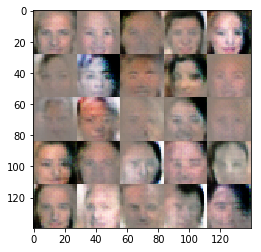

Epoch 1/1 Discriminator Loss: 1.4329 Generator Loss: 1.8376
Epoch 1/1 Discriminator Loss: 1.2805 Generator Loss: 0.6752
Epoch 1/1 Discriminator Loss: 1.2987 Generator Loss: 0.9495
Epoch 1/1 Discriminator Loss: 0.9993 Generator Loss: 0.7911
Epoch 1/1 Discriminator Loss: 1.5682 Generator Loss: 0.3368


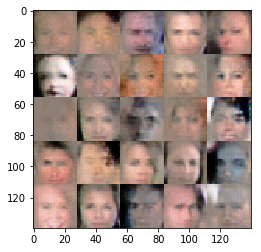

Epoch 1/1 Discriminator Loss: 1.1112 Generator Loss: 0.8030
Epoch 1/1 Discriminator Loss: 0.8199 Generator Loss: 1.4961
Epoch 1/1 Discriminator Loss: 0.7880 Generator Loss: 1.0944
Epoch 1/1 Discriminator Loss: 1.0096 Generator Loss: 1.4425
Epoch 1/1 Discriminator Loss: 1.4068 Generator Loss: 0.5517


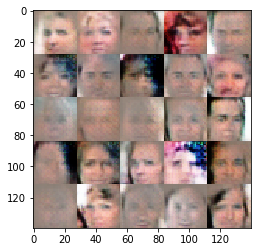

Epoch 1/1 Discriminator Loss: 1.5472 Generator Loss: 0.3565
Epoch 1/1 Discriminator Loss: 1.2460 Generator Loss: 0.5957
Epoch 1/1 Discriminator Loss: 1.3886 Generator Loss: 1.2689
Epoch 1/1 Discriminator Loss: 1.3873 Generator Loss: 0.3716
Epoch 1/1 Discriminator Loss: 1.2337 Generator Loss: 0.5339


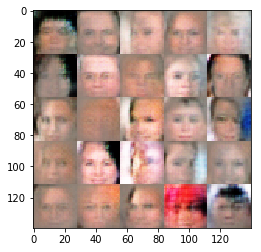

Epoch 1/1 Discriminator Loss: 1.3169 Generator Loss: 0.4381
Epoch 1/1 Discriminator Loss: 1.6233 Generator Loss: 0.3954
Epoch 1/1 Discriminator Loss: 1.0250 Generator Loss: 0.9220
Epoch 1/1 Discriminator Loss: 1.0697 Generator Loss: 0.8322
Epoch 1/1 Discriminator Loss: 1.2670 Generator Loss: 1.8411


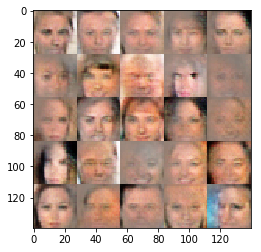

Epoch 1/1 Discriminator Loss: 1.3229 Generator Loss: 0.5060
Epoch 1/1 Discriminator Loss: 1.0541 Generator Loss: 0.6631
Epoch 1/1 Discriminator Loss: 0.9849 Generator Loss: 0.9171
Epoch 1/1 Discriminator Loss: 0.9671 Generator Loss: 0.8101
Epoch 1/1 Discriminator Loss: 1.4443 Generator Loss: 1.5986


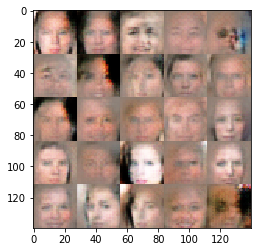

Epoch 1/1 Discriminator Loss: 1.1024 Generator Loss: 1.0037
Epoch 1/1 Discriminator Loss: 1.2275 Generator Loss: 0.5214
Epoch 1/1 Discriminator Loss: 1.0024 Generator Loss: 1.8927
Epoch 1/1 Discriminator Loss: 1.4308 Generator Loss: 0.4565
Epoch 1/1 Discriminator Loss: 1.0767 Generator Loss: 0.7307


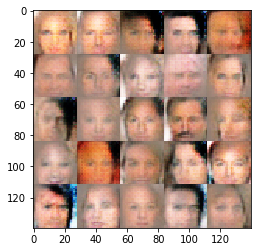

Epoch 1/1 Discriminator Loss: 1.0764 Generator Loss: 0.7696
Epoch 1/1 Discriminator Loss: 0.9612 Generator Loss: 0.9417
Epoch 1/1 Discriminator Loss: 1.2912 Generator Loss: 0.5005
Epoch 1/1 Discriminator Loss: 1.1183 Generator Loss: 0.6440
Epoch 1/1 Discriminator Loss: 1.7344 Generator Loss: 0.2813


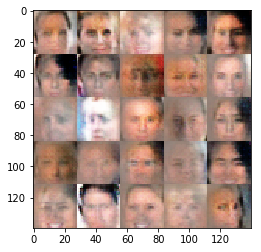

Epoch 1/1 Discriminator Loss: 1.1619 Generator Loss: 1.1021
Epoch 1/1 Discriminator Loss: 1.0849 Generator Loss: 0.8412
Epoch 1/1 Discriminator Loss: 1.0779 Generator Loss: 1.1620
Epoch 1/1 Discriminator Loss: 0.7319 Generator Loss: 1.0655
Epoch 1/1 Discriminator Loss: 1.2719 Generator Loss: 0.4865


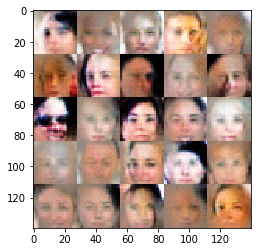

Epoch 1/1 Discriminator Loss: 1.2551 Generator Loss: 0.7721
Epoch 1/1 Discriminator Loss: 1.0804 Generator Loss: 1.4584
Epoch 1/1 Discriminator Loss: 1.4885 Generator Loss: 1.6468
Epoch 1/1 Discriminator Loss: 1.0345 Generator Loss: 0.7077
Epoch 1/1 Discriminator Loss: 1.6097 Generator Loss: 0.3188


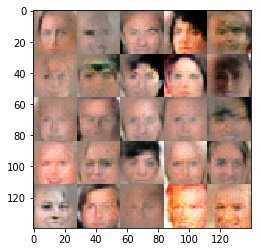

Epoch 1/1 Discriminator Loss: 0.9595 Generator Loss: 1.0069
Epoch 1/1 Discriminator Loss: 1.2250 Generator Loss: 0.8280
Epoch 1/1 Discriminator Loss: 1.0749 Generator Loss: 1.1035
Epoch 1/1 Discriminator Loss: 0.8059 Generator Loss: 1.4750
Epoch 1/1 Discriminator Loss: 1.2678 Generator Loss: 1.2413


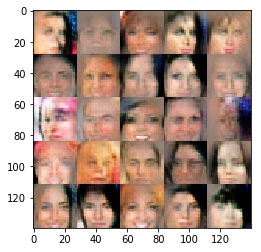

Epoch 1/1 Discriminator Loss: 1.1473 Generator Loss: 0.9017
Epoch 1/1 Discriminator Loss: 1.0054 Generator Loss: 0.8484
Epoch 1/1 Discriminator Loss: 1.1734 Generator Loss: 0.6578
Epoch 1/1 Discriminator Loss: 1.2040 Generator Loss: 0.8342
Epoch 1/1 Discriminator Loss: 1.6753 Generator Loss: 0.3112


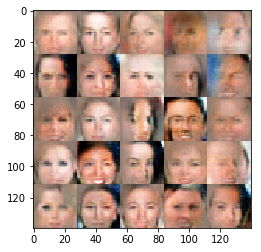

Epoch 1/1 Discriminator Loss: 0.8269 Generator Loss: 1.0221
Epoch 1/1 Discriminator Loss: 1.0975 Generator Loss: 1.1085
Epoch 1/1 Discriminator Loss: 1.4110 Generator Loss: 0.4104
Epoch 1/1 Discriminator Loss: 0.8865 Generator Loss: 0.9972
Epoch 1/1 Discriminator Loss: 1.2117 Generator Loss: 1.4942


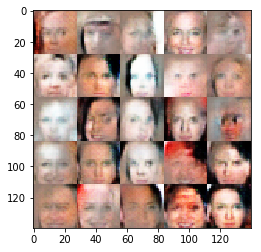

Epoch 1/1 Discriminator Loss: 1.3360 Generator Loss: 0.4456
Epoch 1/1 Discriminator Loss: 1.0559 Generator Loss: 1.2535
Epoch 1/1 Discriminator Loss: 1.0773 Generator Loss: 0.6219
Epoch 1/1 Discriminator Loss: 1.0615 Generator Loss: 0.7139
Epoch 1/1 Discriminator Loss: 1.1678 Generator Loss: 0.5754


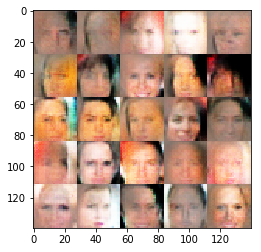

Epoch 1/1 Discriminator Loss: 1.1132 Generator Loss: 0.7664
Epoch 1/1 Discriminator Loss: 2.1397 Generator Loss: 0.1694
Epoch 1/1 Discriminator Loss: 1.1424 Generator Loss: 0.7365
Epoch 1/1 Discriminator Loss: 1.1776 Generator Loss: 1.3479
Epoch 1/1 Discriminator Loss: 1.2862 Generator Loss: 0.4673


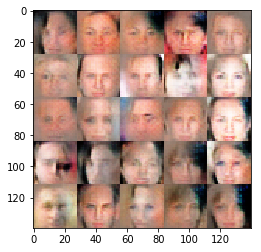

Epoch 1/1 Discriminator Loss: 1.0962 Generator Loss: 1.0756
Epoch 1/1 Discriminator Loss: 1.0284 Generator Loss: 0.8455
Epoch 1/1 Discriminator Loss: 1.3515 Generator Loss: 0.4484
Epoch 1/1 Discriminator Loss: 1.4536 Generator Loss: 1.8729
Epoch 1/1 Discriminator Loss: 1.3992 Generator Loss: 0.8853


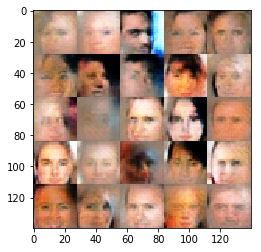

Epoch 1/1 Discriminator Loss: 1.2832 Generator Loss: 0.6345
Epoch 1/1 Discriminator Loss: 1.0451 Generator Loss: 0.7663
Epoch 1/1 Discriminator Loss: 1.2514 Generator Loss: 0.5241
Epoch 1/1 Discriminator Loss: 1.3356 Generator Loss: 0.4028
Epoch 1/1 Discriminator Loss: 1.3479 Generator Loss: 1.3709


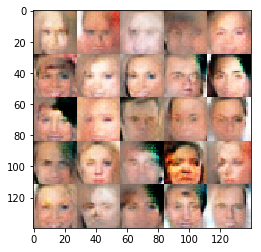

Epoch 1/1 Discriminator Loss: 1.1295 Generator Loss: 0.7647
Epoch 1/1 Discriminator Loss: 1.7440 Generator Loss: 0.2555
Epoch 1/1 Discriminator Loss: 1.3563 Generator Loss: 0.4931
Epoch 1/1 Discriminator Loss: 1.1185 Generator Loss: 1.0520
Epoch 1/1 Discriminator Loss: 1.1726 Generator Loss: 0.7587


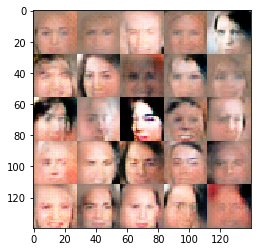

Epoch 1/1 Discriminator Loss: 1.0991 Generator Loss: 0.7152
Epoch 1/1 Discriminator Loss: 0.9960 Generator Loss: 1.1410
Epoch 1/1 Discriminator Loss: 1.7790 Generator Loss: 2.6415
Epoch 1/1 Discriminator Loss: 1.1500 Generator Loss: 1.4835
Epoch 1/1 Discriminator Loss: 1.1343 Generator Loss: 1.0157


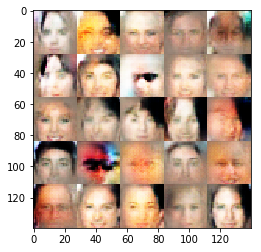

Epoch 1/1 Discriminator Loss: 1.1326 Generator Loss: 0.5480
Epoch 1/1 Discriminator Loss: 1.4579 Generator Loss: 0.4303
Epoch 1/1 Discriminator Loss: 1.1790 Generator Loss: 1.6632
Epoch 1/1 Discriminator Loss: 1.4659 Generator Loss: 0.3825
Epoch 1/1 Discriminator Loss: 1.4065 Generator Loss: 1.5000


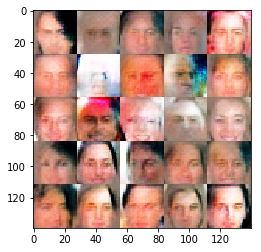

Epoch 1/1 Discriminator Loss: 1.2832 Generator Loss: 0.5620
Epoch 1/1 Discriminator Loss: 1.3717 Generator Loss: 0.5250
Epoch 1/1 Discriminator Loss: 1.3212 Generator Loss: 0.5696
Epoch 1/1 Discriminator Loss: 0.8220 Generator Loss: 1.1990
Epoch 1/1 Discriminator Loss: 1.3074 Generator Loss: 0.8685


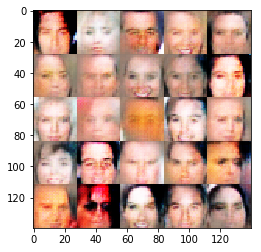

Epoch 1/1 Discriminator Loss: 1.7250 Generator Loss: 2.1260
Epoch 1/1 Discriminator Loss: 1.3101 Generator Loss: 0.5780
Epoch 1/1 Discriminator Loss: 1.2191 Generator Loss: 0.5488
Epoch 1/1 Discriminator Loss: 1.2476 Generator Loss: 0.6024
Epoch 1/1 Discriminator Loss: 1.0383 Generator Loss: 0.9579


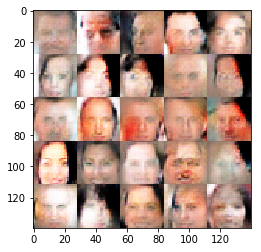

Epoch 1/1 Discriminator Loss: 1.2524 Generator Loss: 0.5806
Epoch 1/1 Discriminator Loss: 1.1884 Generator Loss: 1.5144
Epoch 1/1 Discriminator Loss: 1.4406 Generator Loss: 0.3637
Epoch 1/1 Discriminator Loss: 1.2279 Generator Loss: 0.5096
Epoch 1/1 Discriminator Loss: 1.2932 Generator Loss: 1.7265


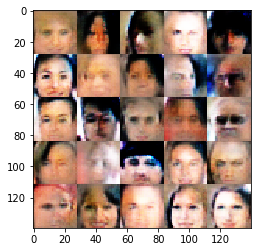

Epoch 1/1 Discriminator Loss: 0.9624 Generator Loss: 0.9916
Epoch 1/1 Discriminator Loss: 0.9821 Generator Loss: 0.8006
Epoch 1/1 Discriminator Loss: 1.1508 Generator Loss: 1.0836
Epoch 1/1 Discriminator Loss: 0.8277 Generator Loss: 1.0355
Epoch 1/1 Discriminator Loss: 1.0312 Generator Loss: 0.8264


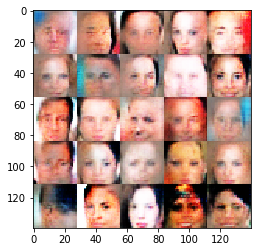

Epoch 1/1 Discriminator Loss: 1.1346 Generator Loss: 0.9735
Epoch 1/1 Discriminator Loss: 1.2614 Generator Loss: 0.8232
Epoch 1/1 Discriminator Loss: 1.0578 Generator Loss: 1.2140
Epoch 1/1 Discriminator Loss: 1.0295 Generator Loss: 0.8675
Epoch 1/1 Discriminator Loss: 1.2776 Generator Loss: 0.6038


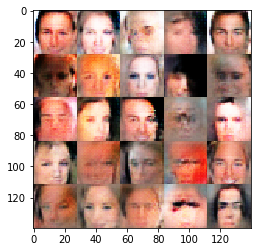

Epoch 1/1 Discriminator Loss: 1.5649 Generator Loss: 0.3074
Epoch 1/1 Discriminator Loss: 1.1426 Generator Loss: 0.7812
Epoch 1/1 Discriminator Loss: 2.6028 Generator Loss: 3.1003
Epoch 1/1 Discriminator Loss: 1.5406 Generator Loss: 0.3410
Epoch 1/1 Discriminator Loss: 1.3549 Generator Loss: 0.4025


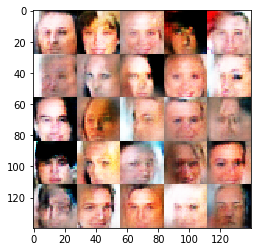

Epoch 1/1 Discriminator Loss: 1.7725 Generator Loss: 0.2594
Epoch 1/1 Discriminator Loss: 0.9378 Generator Loss: 1.4147
Epoch 1/1 Discriminator Loss: 1.0920 Generator Loss: 1.2525
Epoch 1/1 Discriminator Loss: 0.9445 Generator Loss: 0.9607
Epoch 1/1 Discriminator Loss: 1.0026 Generator Loss: 0.8741


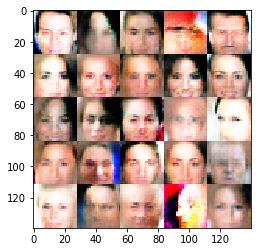

Epoch 1/1 Discriminator Loss: 0.9849 Generator Loss: 0.8890
Epoch 1/1 Discriminator Loss: 1.0911 Generator Loss: 1.0904
Epoch 1/1 Discriminator Loss: 1.2577 Generator Loss: 0.9505
Epoch 1/1 Discriminator Loss: 0.9993 Generator Loss: 0.7088
Epoch 1/1 Discriminator Loss: 1.0619 Generator Loss: 0.7111


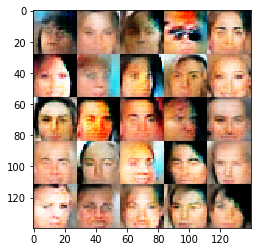

Epoch 1/1 Discriminator Loss: 1.4890 Generator Loss: 0.4151
Epoch 1/1 Discriminator Loss: 1.2324 Generator Loss: 1.3667
Epoch 1/1 Discriminator Loss: 1.2095 Generator Loss: 0.6388
Epoch 1/1 Discriminator Loss: 1.2763 Generator Loss: 1.8248
Epoch 1/1 Discriminator Loss: 1.0905 Generator Loss: 0.8988


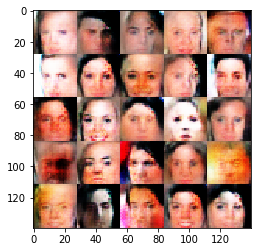

Epoch 1/1 Discriminator Loss: 1.1036 Generator Loss: 1.6688
Epoch 1/1 Discriminator Loss: 1.0732 Generator Loss: 1.1620
Epoch 1/1 Discriminator Loss: 1.4139 Generator Loss: 0.3762
Epoch 1/1 Discriminator Loss: 1.5767 Generator Loss: 2.1036
Epoch 1/1 Discriminator Loss: 1.0416 Generator Loss: 0.8165


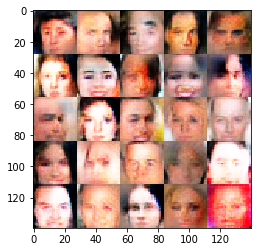

Epoch 1/1 Discriminator Loss: 1.6154 Generator Loss: 0.3325
Epoch 1/1 Discriminator Loss: 0.9354 Generator Loss: 0.8902
Epoch 1/1 Discriminator Loss: 1.5618 Generator Loss: 0.3110
Epoch 1/1 Discriminator Loss: 1.6259 Generator Loss: 0.6513
Epoch 1/1 Discriminator Loss: 1.3587 Generator Loss: 0.4690


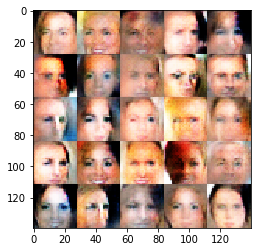

Epoch 1/1 Discriminator Loss: 1.3687 Generator Loss: 0.4157
Epoch 1/1 Discriminator Loss: 1.0788 Generator Loss: 0.7949
Epoch 1/1 Discriminator Loss: 1.2270 Generator Loss: 0.5460
Epoch 1/1 Discriminator Loss: 1.5659 Generator Loss: 0.3023
Epoch 1/1 Discriminator Loss: 1.0930 Generator Loss: 1.5504


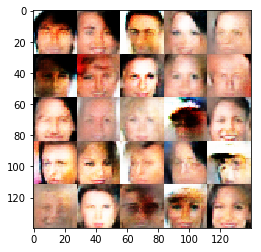

Epoch 1/1 Discriminator Loss: 1.1750 Generator Loss: 0.6037
Epoch 1/1 Discriminator Loss: 1.0652 Generator Loss: 1.2798
Epoch 1/1 Discriminator Loss: 1.0238 Generator Loss: 1.2406
Epoch 1/1 Discriminator Loss: 1.0696 Generator Loss: 0.8517
Epoch 1/1 Discriminator Loss: 1.4287 Generator Loss: 0.4323


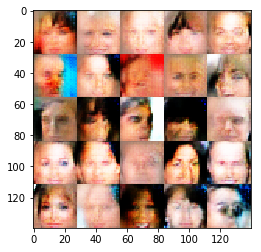

Epoch 1/1 Discriminator Loss: 1.1056 Generator Loss: 0.6926
Epoch 1/1 Discriminator Loss: 1.5162 Generator Loss: 0.3323
Epoch 1/1 Discriminator Loss: 1.1535 Generator Loss: 0.5219
Epoch 1/1 Discriminator Loss: 1.1160 Generator Loss: 0.9575
Epoch 1/1 Discriminator Loss: 1.0345 Generator Loss: 0.9925


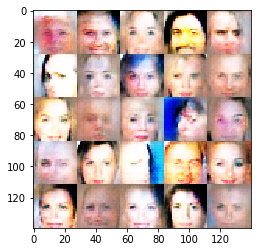

Epoch 1/1 Discriminator Loss: 1.9824 Generator Loss: 0.1938
Epoch 1/1 Discriminator Loss: 1.0511 Generator Loss: 0.6739
Epoch 1/1 Discriminator Loss: 1.5736 Generator Loss: 0.3160
Epoch 1/1 Discriminator Loss: 1.0823 Generator Loss: 0.9187
Epoch 1/1 Discriminator Loss: 1.3150 Generator Loss: 0.4389


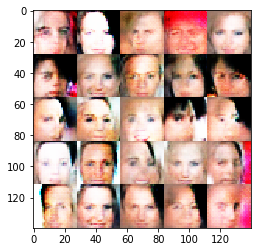

Epoch 1/1 Discriminator Loss: 1.1618 Generator Loss: 0.8715
Epoch 1/1 Discriminator Loss: 1.1365 Generator Loss: 1.8561
Epoch 1/1 Discriminator Loss: 1.1006 Generator Loss: 1.4944
Epoch 1/1 Discriminator Loss: 0.7484 Generator Loss: 1.2330
Epoch 1/1 Discriminator Loss: 1.0938 Generator Loss: 1.0220


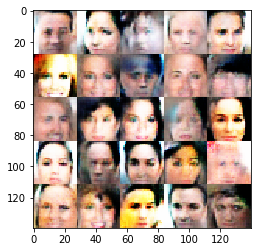

Epoch 1/1 Discriminator Loss: 1.2740 Generator Loss: 1.0176
Epoch 1/1 Discriminator Loss: 0.9711 Generator Loss: 1.1989
Epoch 1/1 Discriminator Loss: 1.1338 Generator Loss: 0.7589
Epoch 1/1 Discriminator Loss: 0.9940 Generator Loss: 1.1014
Epoch 1/1 Discriminator Loss: 1.2360 Generator Loss: 0.5080


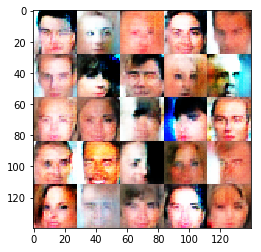

Epoch 1/1 Discriminator Loss: 1.6198 Generator Loss: 1.9774
Epoch 1/1 Discriminator Loss: 1.6267 Generator Loss: 0.3256
Epoch 1/1 Discriminator Loss: 1.4822 Generator Loss: 0.4059
Epoch 1/1 Discriminator Loss: 0.7853 Generator Loss: 1.1347
Epoch 1/1 Discriminator Loss: 1.1096 Generator Loss: 1.0874


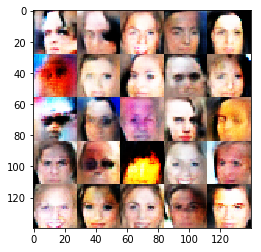

Epoch 1/1 Discriminator Loss: 1.0926 Generator Loss: 1.1495


In [174]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.